# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow 


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [126]:
%pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
bidict                  0.23.1
blinker                 1.7.0
certifi                 2024.2.2
charset-normalizer      3.3.2
click                   8.1.7
colorama                0.4.6
comm                    0.2.1
contourpy               1.2.1
cycler                  0.12.1
debugpy                 1.8.1
decorator               5.1.1
executing               2.0.1
Flask                   3.0.2
Flask-SocketIO          5.3.6
flatbuffers             24.3.25
fonttools               4.51.0
gast                    0.5.4
google-pasta            0.2.0
grpcio                  1.62.1
h11                     0.14.0
h5py                    3.10.0
idna                    3.6
ipykernel               6.29.3
ipython                 8.22.2
itsdangerous            2.1.2
jedi                    0.19.1
Jinja2                  3.1.3
jupyter_client      

In [127]:
import tensorflow as tf
import os

In [128]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [129]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [130]:
import cv2
import imghdr
import matplotlib

In [131]:
data_dir = 'data' 

In [132]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [133]:
for image_class in os.listdir(data_dir):
    print(image_class)

    ##should print happy and sad

happy
sad


In [134]:
happyimg = cv2.imread(os.path.join('data', 'happy', '07-120104-happy_people_are_not_nice_people.jpg'))

In [136]:

print(happyimg)


[[[ 4  5  9]
  [ 4  5  9]
  [ 3  4  8]
  ...
  [17 14 10]
  [17 14 10]
  [18 15 11]]

 [[ 5  6 10]
  [ 4  5  9]
  [ 4  5  9]
  ...
  [17 14 10]
  [17 14 10]
  [17 14 10]]

 [[ 8  9 13]
  [ 7  8 12]
  [ 7  8 12]
  ...
  [17 14 10]
  [17 14 10]
  [17 14 10]]

 ...

 [[15 20 19]
  [13 18 17]
  [11 16 15]
  ...
  [15 20 18]
  [13 18 16]
  [12 17 15]]

 [[15 21 20]
  [13 19 18]
  [11 17 16]
  ...
  [16 19 17]
  [13 18 16]
  [13 18 16]]

 [[17 23 22]
  [14 20 19]
  [12 18 17]
  ...
  [16 19 17]
  [13 18 16]
  [13 18 16]]]


In [137]:
print(type(happyimg), ' and ', happyimg.shape)


<class 'numpy.ndarray'>  and  (540, 1080, 3)


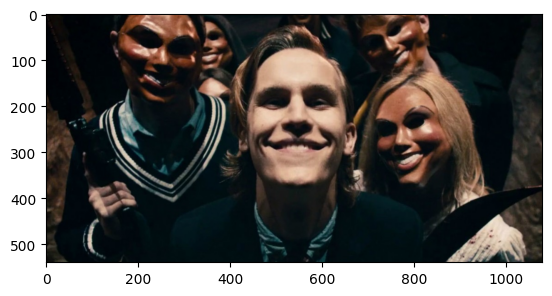

In [138]:
#CONVERT FROM BGR (OPENCV) TO RGB FOR MATPLOTLIB
plt.imshow(cv2.cvtColor(happyimg, cv2.COLOR_BGR2RGB))
plt.show()

In [139]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [140]:
import numpy as np
from matplotlib import pyplot as plt

In [70]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [141]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [142]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [143]:
data_iterator = data.as_numpy_iterator()

In [145]:
batch = data_iterator.next()

In [146]:
# Iterate through batches in the dataset
for batch in data:
    # Print the length of the batch (number of elements in the batch)
    print("Number of elements in the batch:", len(batch))
    
    # Print the shape of the images in the batch (shape of the first element)
    print("Shape of images in the batch:", batch[0].shape)
    
    # Print the labels in the batch (second element)
    print("Labels in the batch:", batch[1])

    # Break the loop after printing information for the first batch
    break


Number of elements in the batch: 2
Shape of images in the batch: (32, 256, 256, 3)
Labels in the batch: tf.Tensor([0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)


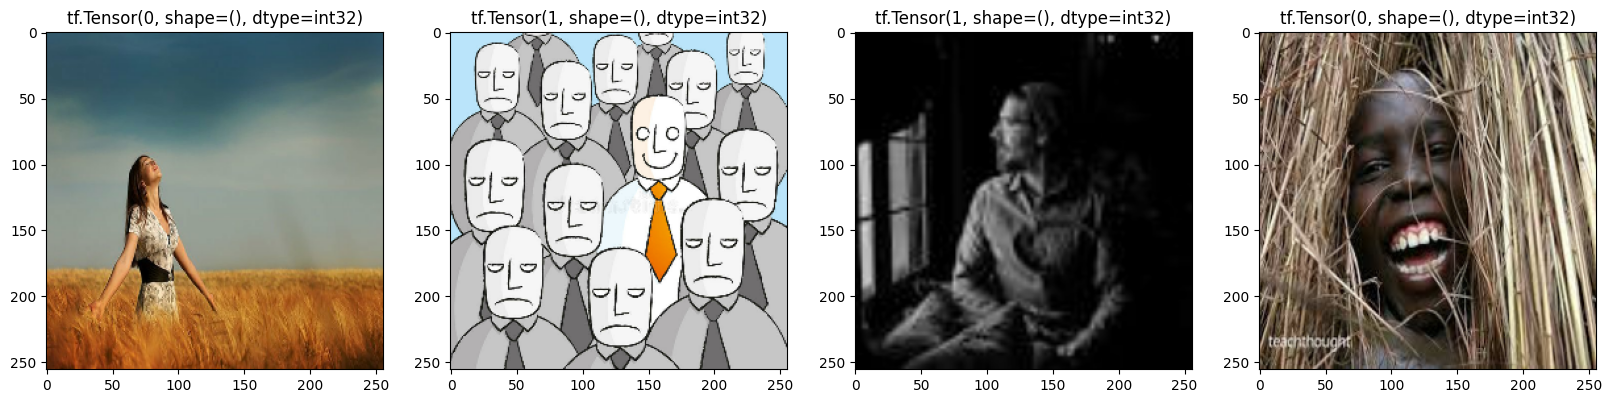

In [149]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.numpy().astype(int))
    ax[idx].set_title(batch[1][idx])  
plt.show()


# 4. Scale Data

In [150]:

data = data.map(lambda x,y: (x/255, y))

In [151]:
data.as_numpy_iterator().next()

(array([[[[0.9764706 , 0.95686275, 0.93333334],
          [0.9764706 , 0.95686275, 0.93333334],
          [0.9764706 , 0.95686275, 0.93333334],
          ...,
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334]],
 
         [[0.9761336 , 0.95652574, 0.93299633],
          [0.9761046 , 0.9565547 , 0.93299633],
          [0.97597295, 0.9566863 , 0.93299633],
          ...,
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334]],
 
         [[0.9746017 , 0.95499384, 0.93146443],
          [0.9744411 , 0.9551545 , 0.93146443],
          [0.9737111 , 0.9558845 , 0.93146443],
          ...,
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334],
          [0.9647059 , 0.9529412 , 0.93333334]],
 
         ...,
 
         [[0.09690563, 0.43844974, 0.60539216],
          [0.09565

# 5. Split Data

In [152]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size+val_size+test_size

10

In [153]:
train_size

7

In [154]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [155]:
print(len(train), len(val), len(test))

7 2 1


# 6. Build Deep Learning Model

In [158]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [159]:
model = Sequential()

In [160]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [161]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [162]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [122]:
logdir='logs'

In [163]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [164]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - accuracy: 0.5584 - loss: 0.7493 - val_accuracy: 0.5469 - val_loss: 0.6608
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step - accuracy: 0.6167 - loss: 0.6464 - val_accuracy: 0.7031 - val_loss: 0.5810
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step - accuracy: 0.7494 - loss: 0.5297 - val_accuracy: 0.8125 - val_loss: 0.4353
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.7654 - loss: 0.4217 - val_accuracy: 0.8594 - val_loss: 0.3878
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.8314 - loss: 0.3721 - val_accuracy: 0.9219 - val_loss: 0.2514
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 504ms/step - accuracy: 0.8135 - loss: 0.3527 - val_accuracy: 0.8281 - val_loss: 0.3798
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.8930 - loss: 0.3005 - val_accuracy: 0.9375 - val_loss: 0.2280
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 515ms/step - accuracy: 0.9515 - loss: 0.2224 - val_accuracy: 0.9688 - val_loss: 0.1439
Epo

# 8. Plot Performance

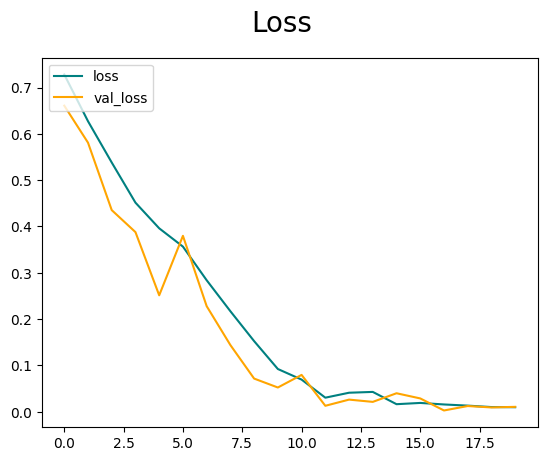

In [165]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

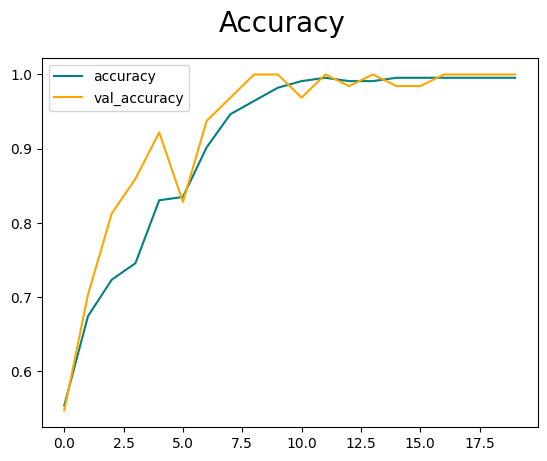

In [166]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [167]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [168]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [169]:
len(test)

1

In [170]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [98]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


# 10. Test

In [172]:
import cv2

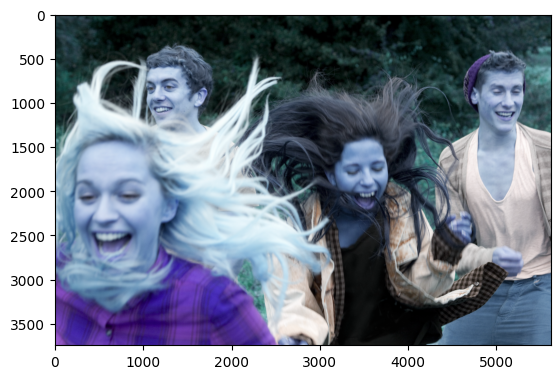

In [173]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

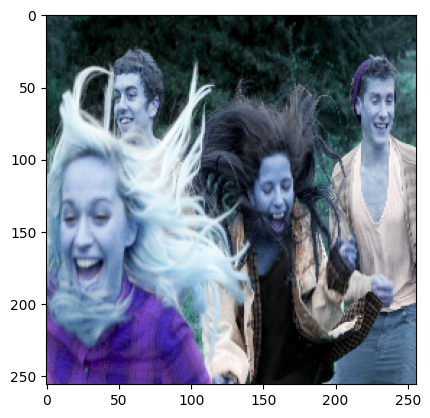

In [174]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [175]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [176]:
yhat

array([[0.09894802]], dtype=float32)

In [178]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [179]:
from tensorflow.keras.models import load_model

In [183]:
model.save(os.path.join('models','CNN_emotion_classifier.h5'))

In [185]:
new_model = load_model(os.path.join('models','CNN_emotion_classifier.h5'))

In [186]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[0.09894802]], dtype=float32)